## (Loan Data from Prosper)
## by (Abanob Morgan)

## Preliminary Wrangling

> this data about banking loan in USA this data has 113,937  loans rows  with 81 variables columns for each data record (loan), including loan amount, borrower rate (or interest rate) loan term , current loan status, borrower income, and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
%matplotlib inline


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head();

In [3]:
df.columns;

### What is the structure of your dataset?

> the data have  113937 rows ,and  81 columns  

### What is/are the main feature(s) of interest in your dataset?

>     I'm most interested in figuring in the data colunms:
        What affects the BorrowerAPR or interest rate?
        Are there differences between loans depending on how large the original loan amount was?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The factors that have the most influence on predicting the outcome of a loan and therefore of most interest are:    
   >
   >+ Term (The length of the loan expressed in months)
   >+ ProsperScore (custom risk score)
   >+ EmploymentStatus (The employment status of the borrower)
   >+ MonthlyLoanPayment (The scheduled monthly loan payment)
   >+ BorrowerRate (The Borrower's interest rate for this loan)
   >+ LoanOriginalAmount (The origination amount of the loan)
   >+ OpenCreditLines (Number of open credit line)
   >+IncomeRange (how much maney this person get within a month)
   >+BorrowerState ( the place/ state where this person lives-in)
    Recommendations (Number of recommendations the borrower had at the time the listing was created)


In [4]:
df.shape

(113937, 81)

In [5]:
df.describe();

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

checking for the null values 

In [7]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

changing the starting and ending dates to date type to be easyer to interact 

## data cleaning 

In [8]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

the categorical columns are term , LoanStatus, ProsperRating (Alpha), ProsperScore, ListingCategory (numeric),BorrowerState,   
Occupation, EmploymentStatus, IsBorrowerHomeowner, CurrentlyInGroup, IncomeRange, IncomeVerifiable, 


the future of the intersinte are ListingNumber, ListingCreationDate, Term, LoanStatus, LoanOriginalAmount, BorrowerAPR, BorrowerRate, ListingCategory, BorrowerState, StatedMonthlyIncome, Occupation, EmploymentStatus, IsBorrowerHomeowner, CurrentlyInGroup, TotalInquiries, DebtToIncomeRatio, MonthlyLoanPayment, TotalTrades, Investors,IncomeRange,ProsperScore, OpenCreditLines

In [9]:
colum= ['ListingNumber','ListingCreationDate','Term','LoanStatus','LoanOriginalAmount'\
        ,'BorrowerAPR','BorrowerRate','ListingCategory (numeric)'\
        ,'BorrowerState','StatedMonthlyIncome', 'Occupation','EmploymentStatus','IsBorrowerHomeowner'\
        ,'CurrentlyInGroup','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors' ,\
       'IncomeRange','ProsperScore', 'OpenCreditLines']
clean_df= df[colum]
clean_df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,StatedMonthlyIncome,...,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,IncomeRange,ProsperScore,OpenCreditLines
0,193129,2007-08-26 19:09:29.263000000,36,Completed,9425,0.16516,0.1580,0,CO,3083.333333,...,True,True,3.0,0.17,330.43,11.0,258,"$25,000-49,999",NaN,4.0
1,1209647,2014-02-27 08:28:07.900000000,36,Current,10000,0.12016,0.0920,2,CO,6125.000000,...,False,False,5.0,0.18,318.93,29.0,1,"$50,000-74,999",7.0,14.0
2,81716,2007-01-05 15:00:47.090000000,36,Completed,3001,0.28269,0.2750,0,GA,2083.333333,...,False,True,1.0,0.06,123.32,NaN,41,Not displayed,NaN,NaN
3,658116,2012-10-22 11:02:35.010000000,36,Current,10000,0.12528,0.0974,16,GA,2875.000000,...,True,False,1.0,0.15,321.45,26.0,158,"$25,000-49,999",9.0,5.0
4,909464,2013-09-14 18:38:39.097000000,36,Current,15000,0.24614,0.2085,2,MN,9583.333333,...,True,False,9.0,0.26,563.97,39.0,20,"$100,000+",4.0,19.0


In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
LoanOriginalAmount           113937 non-null int64
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
StatedMonthlyIncome          113937 non-null float64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
CurrentlyInGroup             113937 non-null bool
TotalInquiries               112778 non-null float64
DebtToIncomeRatio            105383 non-null float64
MonthlyLoanPayment           113937 non-null float64
TotalTr

dorping the null values in the data rows after cleaning the columns ones 

In [11]:
clean_df.isnull().sum()


ListingNumber                    0
ListingCreationDate              0
Term                             0
LoanStatus                       0
LoanOriginalAmount               0
BorrowerAPR                     25
BorrowerRate                     0
ListingCategory (numeric)        0
BorrowerState                 5515
StatedMonthlyIncome              0
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
CurrentlyInGroup                 0
TotalInquiries                1159
DebtToIncomeRatio             8554
MonthlyLoanPayment               0
TotalTrades                   7544
Investors                        0
IncomeRange                      0
ProsperScore                 29084
OpenCreditLines               7604
dtype: int64

In [12]:
clean_df['ProsperScore'].fillna(round(clean_df['ProsperScore'].mean()) , inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:

clean_df.dropna(axis=0 , inplace= True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94854 entries, 0 to 113936
Data columns (total 22 columns):
ListingNumber                94854 non-null int64
ListingCreationDate          94854 non-null object
Term                         94854 non-null int64
LoanStatus                   94854 non-null object
LoanOriginalAmount           94854 non-null int64
BorrowerAPR                  94854 non-null float64
BorrowerRate                 94854 non-null float64
ListingCategory (numeric)    94854 non-null int64
BorrowerState                94854 non-null object
StatedMonthlyIncome          94854 non-null float64
Occupation                   94854 non-null object
EmploymentStatus             94854 non-null object
IsBorrowerHomeowner          94854 non-null bool
CurrentlyInGroup             94854 non-null bool
TotalInquiries               94854 non-null float64
DebtToIncomeRatio            94854 non-null float64
MonthlyLoanPayment           94854 non-null float64
TotalTrades              

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


rediffind the data type for some columns 

In [14]:
clean_df['ListingCreationDate'] =  pd.to_datetime(clean_df['ListingCreationDate'])
clean_df['LoanStatus'] = clean_df['LoanStatus'].astype('category')
clean_df['Term']=clean_df['Term'].astype('category')
clean_df['BorrowerState'] = clean_df['BorrowerState'].astype('category')
clean_df['Occupation'] = clean_df['Occupation'].astype('category')
clean_df['EmploymentStatus'] = clean_df['EmploymentStatus'].astype('category')
clean_df['IsBorrowerHomeowner'] = clean_df['IsBorrowerHomeowner'].astype('category')
clean_df['CurrentlyInGroup'] = clean_df['CurrentlyInGroup'].astype('category')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94854 entries, 0 to 113936
Data columns (total 22 columns):
ListingNumber                94854 non-null int64
ListingCreationDate          94854 non-null datetime64[ns]
Term                         94854 non-null category
LoanStatus                   94854 non-null category
LoanOriginalAmount           94854 non-null int64
BorrowerAPR                  94854 non-null float64
BorrowerRate                 94854 non-null float64
ListingCategory (numeric)    94854 non-null int64
BorrowerState                94854 non-null category
StatedMonthlyIncome          94854 non-null float64
Occupation                   94854 non-null category
EmploymentStatus             94854 non-null category
IsBorrowerHomeowner          94854 non-null category
CurrentlyInGroup             94854 non-null category
TotalInquiries               94854 non-null float64
DebtToIncomeRatio            94854 non-null float64
MonthlyLoanPayment           94854 non-null float6

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [15]:
clean_df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,StatedMonthlyIncome,...,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,IncomeRange,ProsperScore,OpenCreditLines
0,193129,2007-08-26 19:09:29.263,36,Completed,9425,0.16516,0.1580,0,CO,3083.333333,...,True,True,3.0,0.17,330.43,11.0,258,"$25,000-49,999",6.0,4.0
1,1209647,2014-02-27 08:28:07.900,36,Current,10000,0.12016,0.0920,2,CO,6125.000000,...,False,False,5.0,0.18,318.93,29.0,1,"$50,000-74,999",7.0,14.0
3,658116,2012-10-22 11:02:35.010,36,Current,10000,0.12528,0.0974,16,GA,2875.000000,...,True,False,1.0,0.15,321.45,26.0,158,"$25,000-49,999",9.0,5.0
4,909464,2013-09-14 18:38:39.097,36,Current,15000,0.24614,0.2085,2,MN,9583.333333,...,True,False,9.0,0.26,563.97,39.0,20,"$100,000+",4.0,19.0
5,1074836,2013-12-14 08:26:37.093,60,Current,15000,0.15425,0.1314,1,NM,8333.333333,...,True,False,2.0,0.36,342.37,47.0,1,"$100,000+",10.0,17.0


## Univariate Exploration

> let's take a look at the data  distribution of the main variable of interest
    >+ LoanStatus
    >+ Term
    >+ ProsperScore
    >+ LoanOriginalAmount
    >+ BorrowerRate
    >+ EmploymentStatus
    >+ IncomeRange
    >+ MonthlyLoanPayment

let's check the Loan status first 

In [16]:
clean_df.LoanStatus.describe()

count       94854
unique         12
top       Current
freq        51174
Name: LoanStatus, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

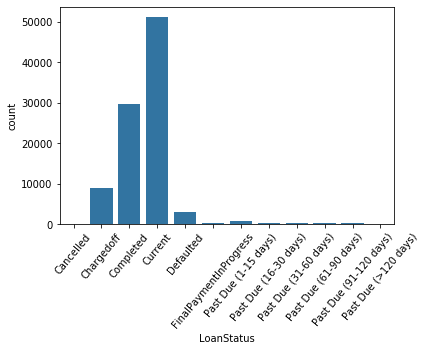

In [17]:
color_base= sns.color_palette()[0]
sns.countplot(data = clean_df, x = 'LoanStatus', color=color_base)
plt.xticks(rotation= 50)

let's compine al past due within one column. since I mostly interested if a loan is past due and not for how long the loan is overdue.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Current Status of the Loan')

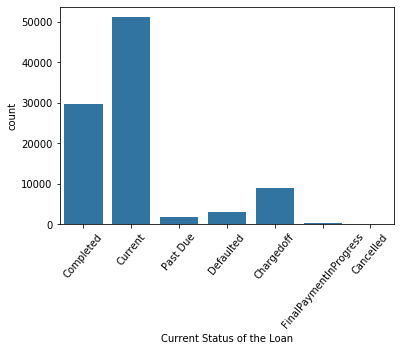

In [18]:
clean_df['LoanStatus'] = clean_df['LoanStatus'].replace(['Past Due (1-15 days)',\
    'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',\
    'Past Due (16-30 days)','Past Due (>120 days)'],'Past Due')
sns.countplot(data = clean_df, x = 'LoanStatus', color=color_base)
plt.xticks(rotation= 50)
plt.xlabel('Current Status of the Loan')

in this section we will discripe the Term in the cleaned data 


In [19]:
clean_df.Term.value_counts()

36    70555
60    22884
12     1415
Name: Term, dtype: int64

In [20]:
clean_df.Term.describe()

count     94854
unique        3
top          36
freq      70555
Name: Term, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

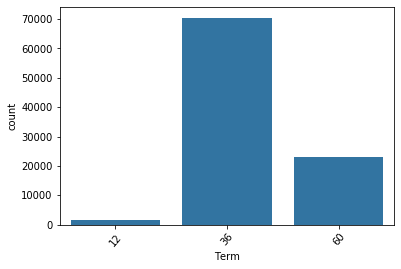

In [21]:
sns.countplot(data = clean_df, x = 'Term', color=color_base)
plt.xticks(rotation= 50)

ProsperScore


In [22]:
# getting a first overview over the variable ProsperScore
clean_df.ProsperScore.describe()


count    94854.000000
mean         6.064489
std          2.116395
min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

In [23]:
orderdScore= clean_df.ProsperScore.value_counts()
orderdScore

6.0     29787
8.0     11432
4.0     10826
7.0      9817
5.0      8646
9.0      6589
3.0      6374
2.0      4675
10.0     4601
11.0     1392
1.0       715
Name: ProsperScore, dtype: int64

A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. **from the data Prosper Loan Data - Variable Definitions** <a href="https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0">here</a>

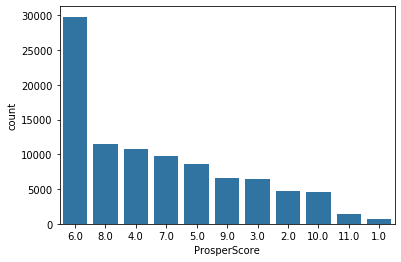

In [24]:
sns.countplot(data= clean_df, x = 'ProsperScore', color= color_base, order=orderdScore.index)
plt.xlabel('ProsperScore')
plt.show()


In [25]:
drop_pro= clean_df.query('ProsperScore == 11')
clean_df.drop(axis =0 , labels= drop_pro.index, inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
clean_df.shape

(93462, 22)

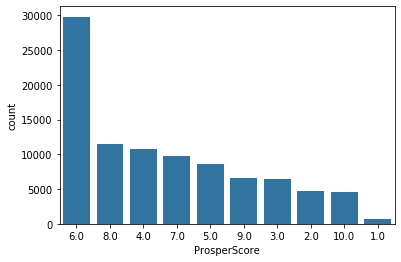

In [27]:
orderdScore= clean_df.ProsperScore.value_counts()
orderdScore
sns.countplot(data= clean_df, x = 'ProsperScore', color= color_base, order=orderdScore.index)
plt.xlabel('ProsperScore')
plt.show()

LoanOriginalAmount


In [28]:
clean_df.LoanOriginalAmount.describe()


count    93462.000000
mean      8652.936894
std       6302.099036
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [29]:
clean_df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,StatedMonthlyIncome,...,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,IncomeRange,ProsperScore,OpenCreditLines
0,193129,2007-08-26 19:09:29.263,36,Completed,9425,0.16516,0.1580,0,CO,3083.333333,...,True,True,3.0,0.17,330.43,11.0,258,"$25,000-49,999",6.0,4.0
1,1209647,2014-02-27 08:28:07.900,36,Current,10000,0.12016,0.0920,2,CO,6125.000000,...,False,False,5.0,0.18,318.93,29.0,1,"$50,000-74,999",7.0,14.0
3,658116,2012-10-22 11:02:35.010,36,Current,10000,0.12528,0.0974,16,GA,2875.000000,...,True,False,1.0,0.15,321.45,26.0,158,"$25,000-49,999",9.0,5.0
4,909464,2013-09-14 18:38:39.097,36,Current,15000,0.24614,0.2085,2,MN,9583.333333,...,True,False,9.0,0.26,563.97,39.0,20,"$100,000+",4.0,19.0
5,1074836,2013-12-14 08:26:37.093,60,Current,15000,0.15425,0.1314,1,NM,8333.333333,...,True,False,2.0,0.36,342.37,47.0,1,"$100,000+",10.0,17.0


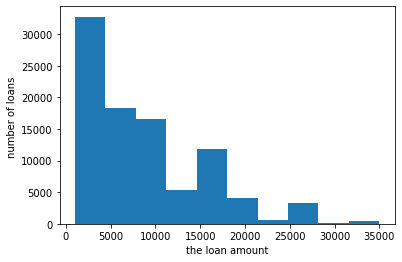

In [30]:
plt.hist(data= clean_df, x= 'LoanOriginalAmount')
plt.xlabel('the loan amount')
plt.ylabel('number of loans ')
plt.show()

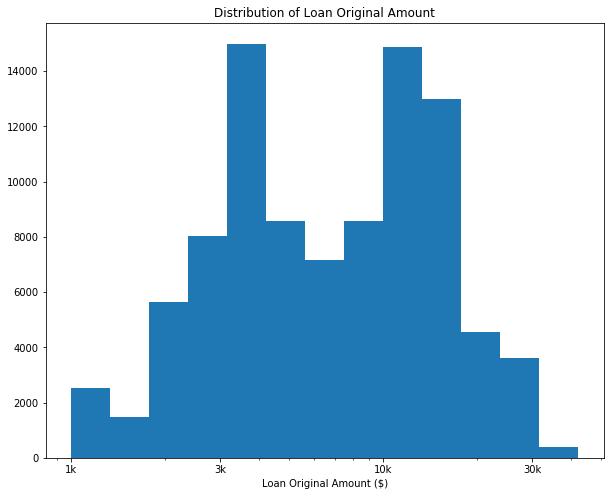

In [68]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.125
# To find the min and max use:
bins = 10 ** np.arange(3.0, np.log10(clean_df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
# min is: 3.000000 and max is: 4.544068. 
# so ticks could be calculated by min= 10**3.000000=1000 and max= 10**4.5=30000
ticks=[1000, 3000, 10000, 30000]
labels=["1k", "3k", "10k","30k"]
plt.figure(figsize=[10, 8])
plt.hist(data = clean_df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Loan Original Amount ')
plt.title("Distribution of Loan Original Amount")
plt.show()



BorrowerRate


In [31]:
clean_df.BorrowerRate.describe()

count    93462.000000
mean         0.192522
std          0.074339
min          0.000000
25%          0.134900
50%          0.182400
75%          0.249900
max          0.360000
Name: BorrowerRate, dtype: float64

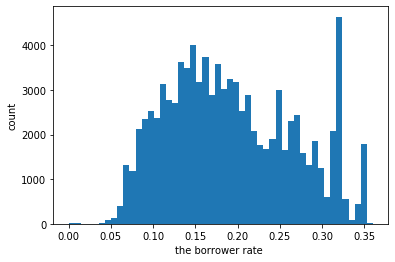

In [32]:
# Histogramm  BorrowerRate (Borrower's interest rate for this loan)
plt.hist(data = clean_df, x= 'BorrowerRate', bins= 50);
plt.xlabel('the borrower rate ')
plt.ylabel('count')
plt.show()

EmploymentStatus


In [33]:
clean_df.EmploymentStatus.describe()

count        93462
unique           7
top       Employed
freq         64531
Name: EmploymentStatus, dtype: object

In [34]:
num_emp_status=clean_df.EmploymentStatus.value_counts()
num_emp_status

Employed         64531
Full-time        24105
Other             2180
Self-employed      993
Part-time          884
Retired            702
Not employed        67
Name: EmploymentStatus, dtype: int64

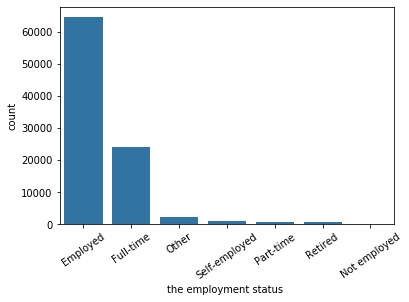

In [35]:
# plotting EmploymentStatus 
sns.countplot(data = clean_df, x= 'EmploymentStatus', order= num_emp_status.index, color=color_base);
plt.xlabel('the employment status ')
plt.xticks(rotation = 35)
plt.ylabel('count')
plt.show()

The employment status of the borrowers shows that most of the loans where give to customers they are employed and full-time jops  indicates that the loans go to the poeple they have stable jobs . But the data shows that even unemployed and retired persons could get a loan


IncomeRange


In [36]:
clean_df.IncomeRange.describe()

count              93462
unique                 7
top       $25,000-49,999
freq               28493
Name: IncomeRange, dtype: object

In [37]:
incomeRagne_count= clean_df.IncomeRange.value_counts()
incomeRagne_count

$25,000-49,999    28493
$50,000-74,999    28268
$75,000-99,999    15439
$100,000+         15246
$1-24,999          5860
Not displayed       101
Not employed         55
Name: IncomeRange, dtype: int64

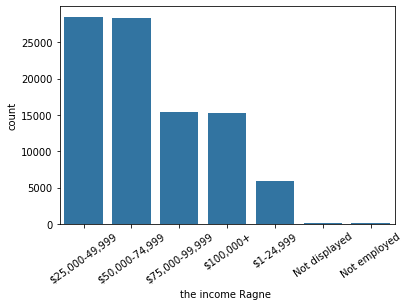

In [38]:
#ploting the income range for the loads 
sns.countplot(data= clean_df, x= 'IncomeRange', order=incomeRagne_count.index, color=color_base)

plt.xlabel('the income Ragne ')
plt.xticks(rotation = 35)
plt.ylabel('count')
plt.show()


The income range of the borrowers shows that most of the loans where give to customers with a income between 25,000 and 74,999 which indicates that the borrowers are mostly middle-class. However, there are a fairly high number of borrowers that earns more than 75,000. One can also see that people that are not employed, not displayed their income or have an income of 0 received a loan from Prosper as well. They might be other criterias than income that qualifies one to get a loan at Prosper.


MonthlyLoanPayment

In [39]:
clean_df.MonthlyLoanPayment.describe()

count    93462.000000
mean       280.565380
std        192.684196
min          0.000000
25%        139.640000
50%        232.265000
75%        378.567500
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [40]:
num_monthlyLoan = clean_df.MonthlyLoanPayment.value_counts()
num_monthlyLoan

173.71    1929
0.00       735
172.76     460
86.85      402
174.20     353
          ... 
127.86       1
162.94       1
652.24       1
488.75       1
482.08       1
Name: MonthlyLoanPayment, Length: 20731, dtype: int64

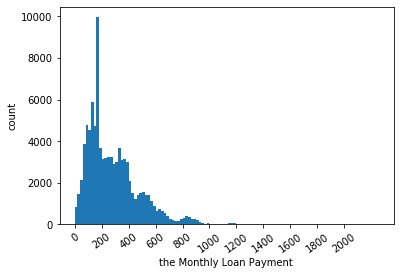

In [41]:
binsize = 20
bins = np.arange(clean_df.MonthlyLoanPayment.min(), clean_df.MonthlyLoanPayment.max()+binsize, binsize)
plt.hist(data= clean_df, x= 'MonthlyLoanPayment', bins= bins )

plt.xlabel('the Monthly Loan Payment ')
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000],rotation = 35)
plt.ylabel('count')
plt.show()


The distribution is right skrewed and long-tailed with a lot of loans with small montly payments. The peak is at around 200. A strange observation is the fact that around 1000 loans have a monthly payment of 0 which doesnt really make sense but might be related to some special arrangement (for example: the customer does not need to pay back the loan during the first 6 months). Therefore, I decided to the keep these values in the dataset.


In [42]:
clean_df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,StatedMonthlyIncome,...,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,IncomeRange,ProsperScore,OpenCreditLines
0,193129,2007-08-26 19:09:29.263,36,Completed,9425,0.16516,0.1580,0,CO,3083.333333,...,True,True,3.0,0.17,330.43,11.0,258,"$25,000-49,999",6.0,4.0
1,1209647,2014-02-27 08:28:07.900,36,Current,10000,0.12016,0.0920,2,CO,6125.000000,...,False,False,5.0,0.18,318.93,29.0,1,"$50,000-74,999",7.0,14.0
3,658116,2012-10-22 11:02:35.010,36,Current,10000,0.12528,0.0974,16,GA,2875.000000,...,True,False,1.0,0.15,321.45,26.0,158,"$25,000-49,999",9.0,5.0
4,909464,2013-09-14 18:38:39.097,36,Current,15000,0.24614,0.2085,2,MN,9583.333333,...,True,False,9.0,0.26,563.97,39.0,20,"$100,000+",4.0,19.0
5,1074836,2013-12-14 08:26:37.093,60,Current,15000,0.15425,0.1314,1,NM,8333.333333,...,True,False,2.0,0.36,342.37,47.0,1,"$100,000+",10.0,17.0


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is a couple types of  varibles in the data categorical and numerical variables. It is described below where log tranformation is used.   
> ### categorical
Term     
BorrowerState   
Occupation   
EmploymentStatus   
IsBorrowerHomeowner   
CurrentlyInGroup   
IncomeRang   
> ### numerical 
ListingNumber (id)     
ListingCreationDate  (date)   
LoanOriginalAmount  (Binomial)    
BorrowerAPR    
BorrowerRate (uninomial)     
ListingCategory    
StatedMonthlyIncome    
TotalInquiries    
DebtToIncomeRatio  (uninomial, has outliers)     
MonthlyLoanPayment    
TotalTrades    
Investors    
ProsperScore    
OpenCreditLines (uninomial)    
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>+ Since the variables EmploymentStatus, ProsperScore, Term, IncomeRange are basically categorical variabels, I
    changed their datatype till categorical
>+ The bar chart of the Prosper Score showed that there are customers in the data set that have a score of 11 which should not be possible since the score just ranges from 1-10 which I cleaned (removed them from the dataset)
>+ around 1000 loans have a monthly payment of 0 which doesnt really make sense but might be related to some special arrangement (for example: the customer does not need to pay back the loan during the first 6 months). Therefore, I decided to the keep these values in the dataset.


## Bivariate Exploration

> As mentoined in previous sessions, I am interested in the relationship between certain variables and the outcome of the loan (current status of the loan). So I will now plot the variables of interest against the outcome of the loan. Since the we have both categorical and numeric in the data set, I will plot those seperatly: the first part with numeric variables (I plot a violinplot and a boxplot for each variable) and the second part with categorical variables. Since the loan status current and FinalPaymentInProgress doesnt really say much about the outcome and will change its status over time, the investigation will not put much emphasis on this status and rather focus on the ones that are completed versus the ones that defaultet, charged-off and past due

#### Numeric Variabales visualization

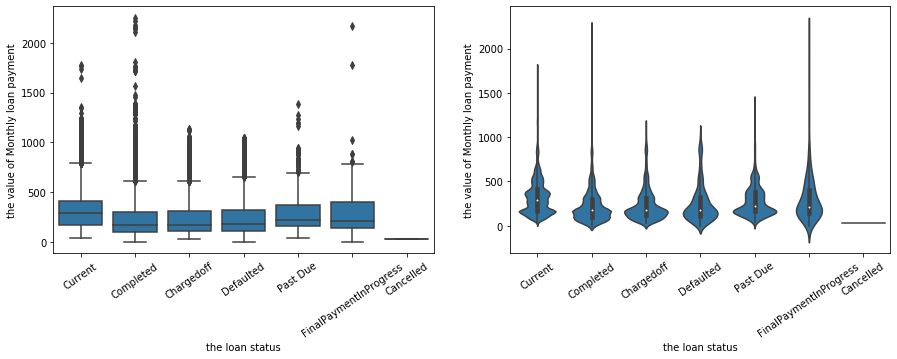

In [43]:
#plotting the relation between the loan status and  monthy loan payment with a violinplot and a boxplot. 
plt.figure(figsize = [15, 10])
plt.subplot(2,2,1)
order= clean_df.LoanStatus.value_counts()
sns.boxplot(data= clean_df, x= clean_df.LoanStatus, y= clean_df.MonthlyLoanPayment, order=order.index, color= color_base)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of Monthly loan payment')

plt.subplot(2,2,2)
sns.violinplot(data = clean_df, x= clean_df.LoanStatus, y= clean_df.MonthlyLoanPayment,color=color_base, order=order.index)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of Monthly loan payment')
plt.show()



The plots show that there is relationship between the monthly payments and the negative outcome of the loan for Prosper: loans that are charged-off, loans with past due payments and defaulted loans have in average higher monthly payments.

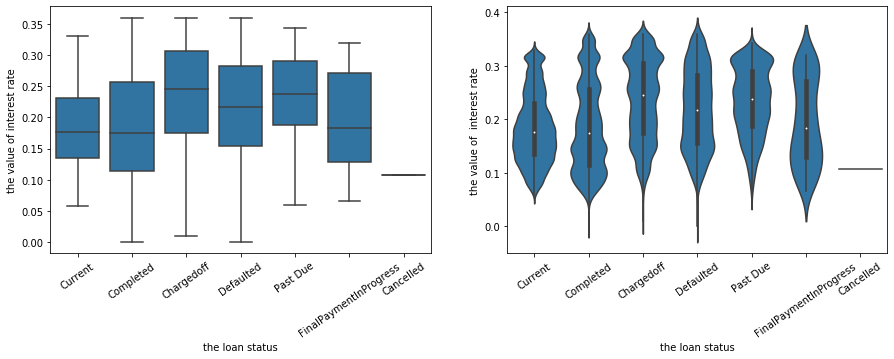

In [44]:
#plotting the relation between teh loan status and  interest rate with a violinplot and a boxplot  
plt.figure(figsize = [15, 10])
plt.subplot(2,2,1)

sns.boxplot(data= clean_df, x= clean_df.LoanStatus, y= clean_df.BorrowerRate, order=order.index, color= color_base)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of interest rate')

plt.subplot(2,2,2)
sns.violinplot(data = clean_df, x= clean_df.LoanStatus, y= clean_df.BorrowerRate,color=color_base, order=order.index)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of  interest rate')
plt.show()


The plots clearly show that loans status that are charged-off, loans with past due payments and defaulted loans have in average higher interest rates than loans that are completed. The highest interest rates are asscociated with loans that are charged-off and with loans that have past due payments


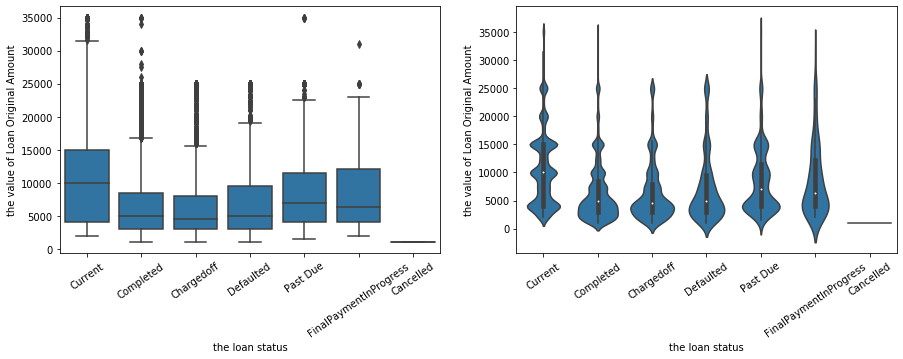

In [45]:
#plotting the relation between the loanStatus and LoanOriginalAmount (Original Loan Amount) with a violinplot and a boxplot  
plt.figure(figsize = [15, 10])
plt.subplot(2,2,1)

sns.boxplot(data= clean_df, x= clean_df.LoanStatus, y= clean_df.LoanOriginalAmount, order=order.index, color= color_base)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of Loan Original Amount')

plt.subplot(2,2,2)
sns.violinplot(data = clean_df, x= clean_df.LoanStatus, y= clean_df.LoanOriginalAmount,color=color_base, order=order.index)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of Loan Original Amount')
plt.show()

It seems that the original loan amount doesnt have an impact with the final status of the loan: the original loan amount is about the same in average for loans that are completed, charged-off or defaulted. However, loans with past due payments have in average an higher orginal loan amount

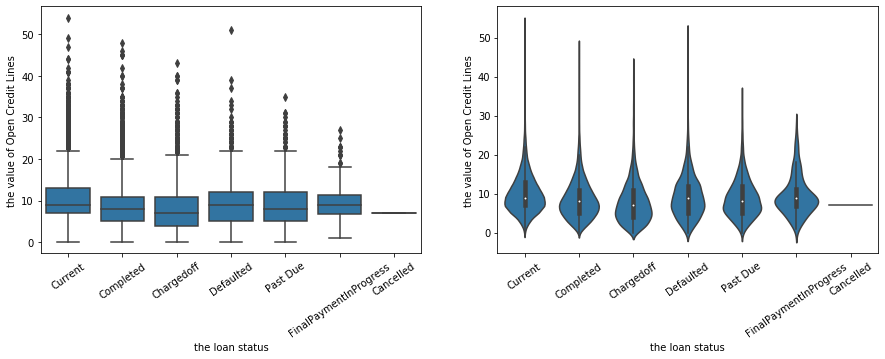

In [46]:
#plotting the relation between the loan status and OpenCreditLines   with a violinplot and a boxplot 
plt.figure(figsize = [15, 10])
plt.subplot(2,2,1)
order= clean_df.LoanStatus.value_counts()
sns.boxplot(data= clean_df, x= clean_df.LoanStatus, y= clean_df.OpenCreditLines, order=order.index, color= color_base)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of Open Credit Lines')

plt.subplot(2,2,2)
sns.violinplot(data = clean_df, x= clean_df.LoanStatus, y= clean_df.OpenCreditLines,color=color_base, order=order.index)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of Open Credit Lines')
plt.show()

The amout of open credit lines doesnt have to have an impact on the outcome of a loan

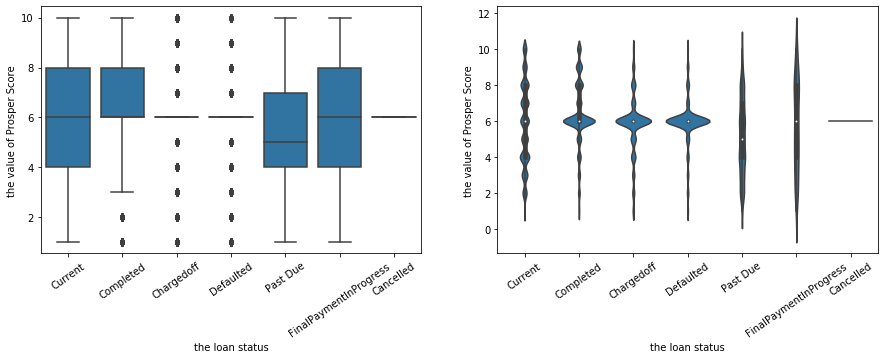

In [47]:
#plotting the relation between the loan status and ProsperScore   with a violinplot and a boxplot 
plt.figure(figsize = [15, 10])
plt.subplot(2,2,1)
order= clean_df.LoanStatus.value_counts()
sns.boxplot(data= clean_df, x= clean_df.LoanStatus, y= clean_df.ProsperScore, order=order.index, color= color_base)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of Prosper Score')

plt.subplot(2,2,2)
sns.violinplot(data = clean_df, x= clean_df.LoanStatus, y= clean_df.ProsperScore,color=color_base, order=order.index)
plt.xticks(rotation = 35)
plt.xlabel('the loan status') 
plt.ylabel('the value of Prosper Score')
plt.show()

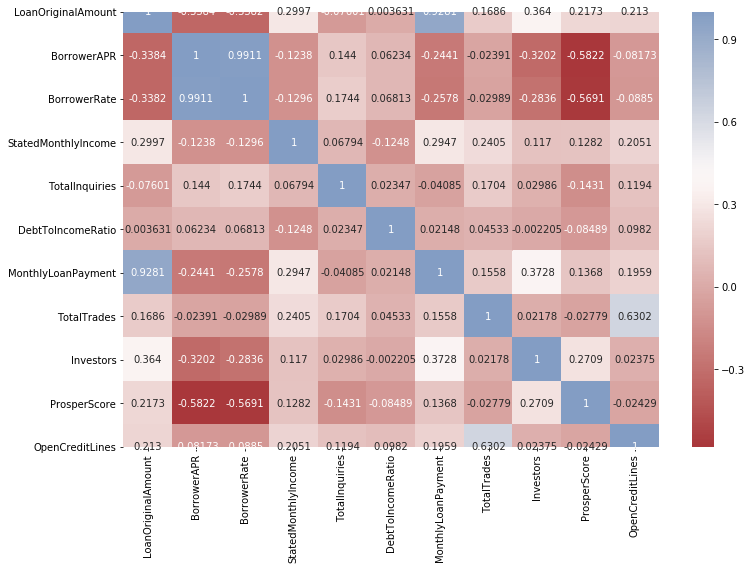

In [48]:
# correlation plot we will plotting a heatmap for all the numerical value to see the relation between them 
numeric_values = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', \
                  'StatedMonthlyIncome','TotalInquiries', 'DebtToIncomeRatio',\
                 'MonthlyLoanPayment', 'TotalTrades','Investors', 'ProsperScore','OpenCreditLines']
plt.figure(figsize = [12, 8])
sns.heatmap(clean_df[numeric_values].corr(), annot = True, fmt = '.4g',
           cmap = 'vlag_r', center = 0.4)


There is not a good correlation between most features. However, the correlation between:

- MolthlyLoanPayment and LoanOriginalAmount is .9281
- BorrowerAPR and BorrowerRate is .9911
- TotalTrades and OpenCreditLines is 0.6302

Besides, there is a negative relationship between (LoanOrgingalAmount and prosperScore) and (BorrowRate, and BorrowRate)


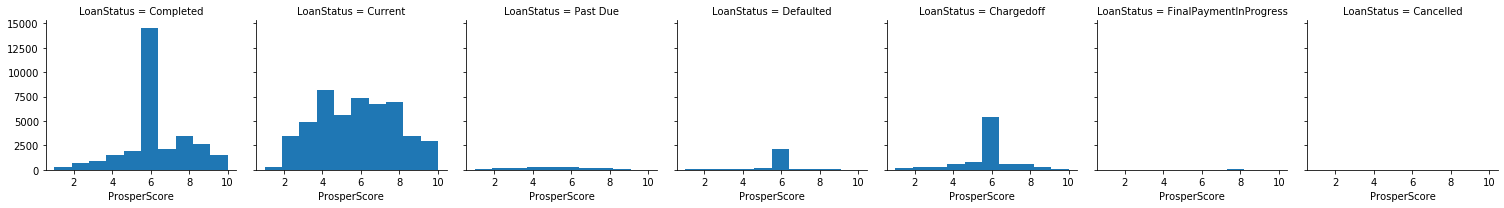

In [49]:
# plotting the loan status for each prosper score using facet grid to show each loan status individually 
g= sns.FacetGrid(data= clean_df, col='LoanStatus')
g.map(plt.hist , 'ProsperScore')

Text(0, 0.5, 'the value of Prosper Score')

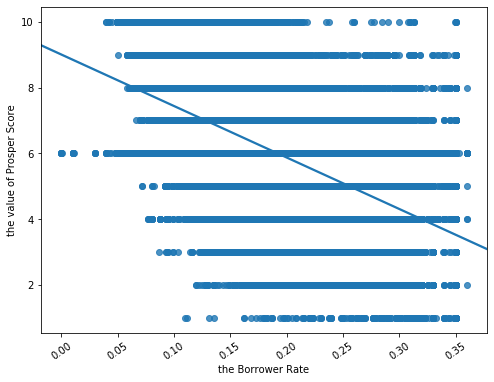

In [50]:
#plotting the relation between the Borrower rate  and ProsperScore   with a violinplot and a boxplot 
plt.figure(figsize = [8, 6])
order= clean_df.LoanStatus.value_counts()
sns.regplot(data= clean_df, x= clean_df.BorrowerRate, y= clean_df.ProsperScore)
plt.xticks(rotation = 35)
plt.xlabel('the Borrower Rate') 
plt.ylabel('the value of Prosper Score')

# this plot shows us the relation between prosper score and borrower rate is negative 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


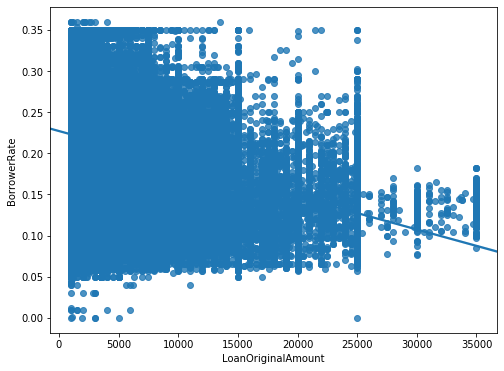

In [71]:
# scatter plot of BorrowerRate (numeric) vs. LoanOriginalAmount (numeric)
sample=np.random.choice(clean_df.shape[0],2000, replace=False)
loans_noNAN_subset=clean_df.loc[sample]
plt.figure(figsize = [8, 6])
sns.regplot(data = clean_df, x = 'LoanOriginalAmount', y= 'BorrowerRate')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.show()


#### Categorical  Variabales visualization

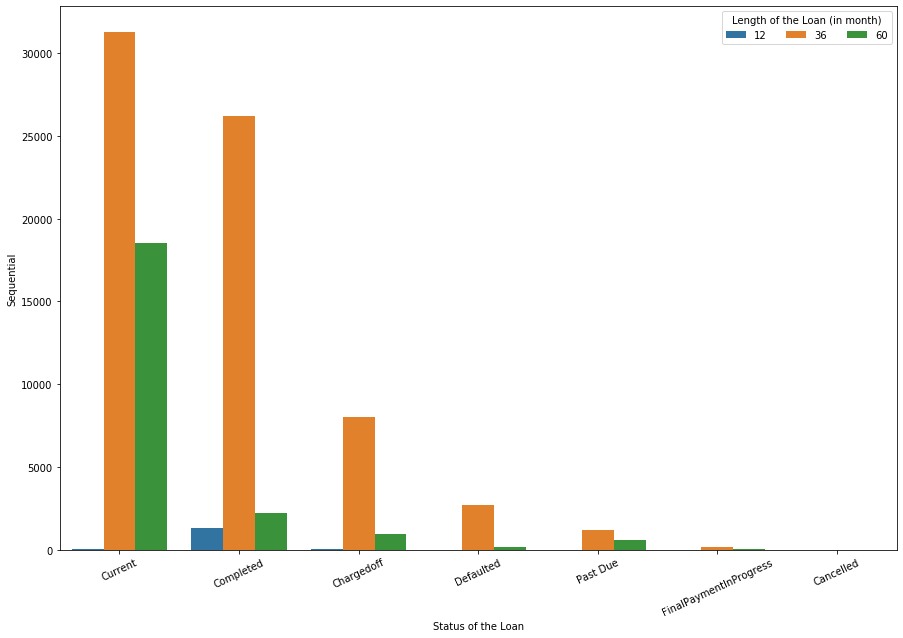

In [51]:
#plotting the relation between loan status and Term (length of the Loan) variabels  with help of a clusterd bar chart
plt.figure(figsize = [15,10])
ax = sns.countplot(data = clean_df, x = 'LoanStatus', hue = 'Term', order = order.index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel("Sequential");


The length of the loan status seem do not to have an impact on the outcome of the loan: no matter what status a loan has, the most common length is 36 month and least common is 12 month

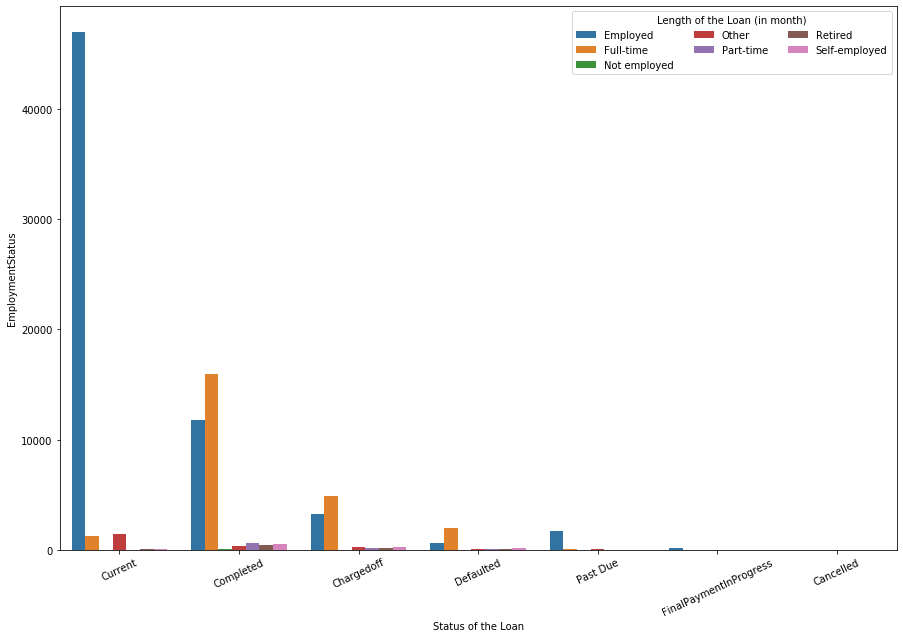

In [52]:
#plotting the relation between loan status and EmploymentStatus variabels  with help of a clusterd bar chart
plt.figure(figsize = [15,10])
ax = sns.countplot(data = clean_df, x = 'LoanStatus', hue = 'EmploymentStatus', order = order.index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel("EmploymentStatus");


The status of the employment of the borrower seem not to have an impact on the outcome of the loan. also this graph shows the employed and full-time  mostly get the loans 

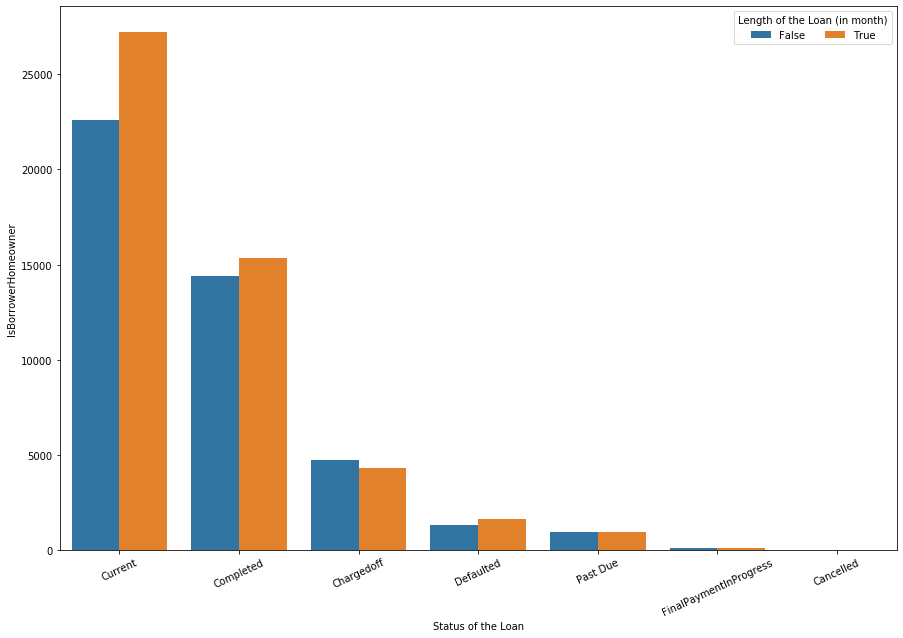

In [53]:
#plotting the relation between loan status and IsBorrowerHomeowner variabels  with help of a clusterd bar chart
plt.figure(figsize = [15,10])
ax = sns.countplot(data = clean_df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', order = order.index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel("IsBorrowerHomeowner");


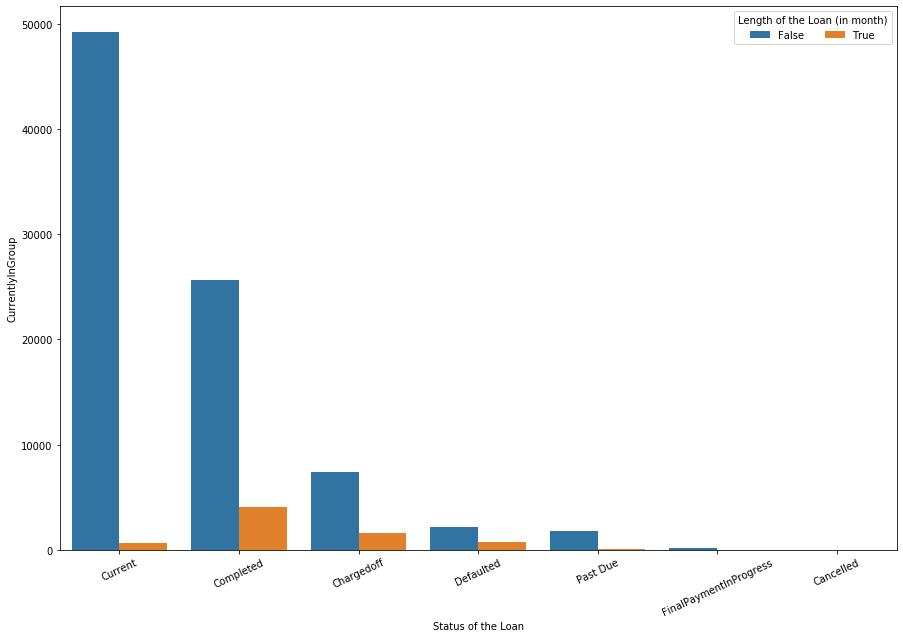

In [54]:
#plotting the relation between loan status and CurrentlyInGroup variabels  with help of a clusterd bar chart
plt.figure(figsize = [15,10])
ax = sns.countplot(data = clean_df, x = 'LoanStatus', hue = 'CurrentlyInGroup', order = order.index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel("CurrentlyInGroup");


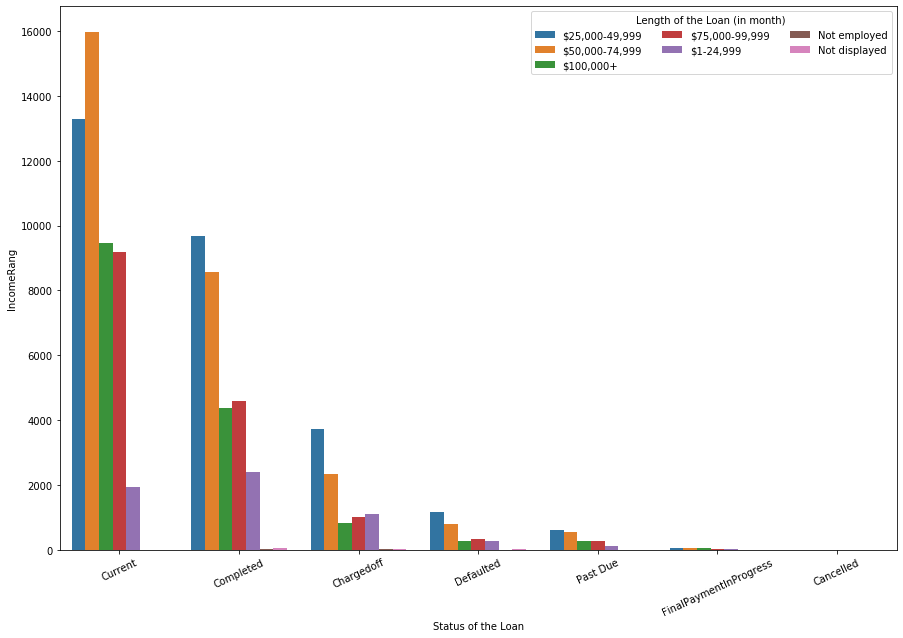

In [55]:
#plotting the relation between loan status and IncomeRang variabels  with help of a clusterd bar chart
plt.figure(figsize = [15,10])
ax = sns.countplot(data = clean_df, x = 'LoanStatus', hue = clean_df.IncomeRange, order = order.index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel("IncomeRang");

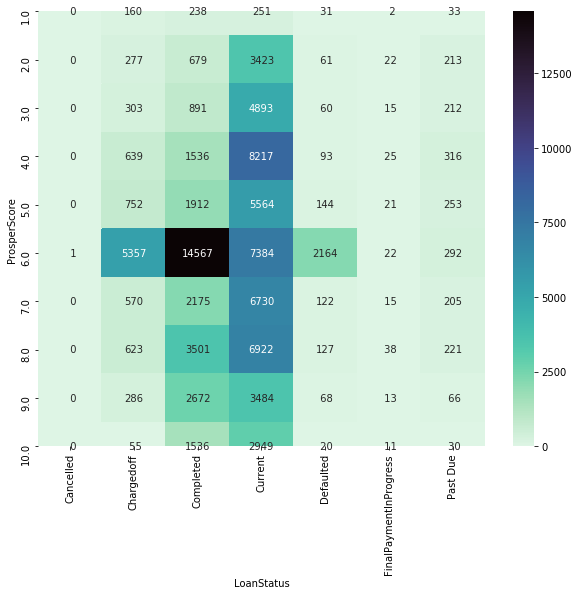

In [56]:
ct_counts=clean_df.groupby(["ProsperScore", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="ProsperScore", columns="LoanStatus", values="count")
ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)

plt.figure(figsize = [10,8])
sns.heatmap(ct_counts,cmap="mako_r", annot=True , fmt='3g');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The majority (~50,000) of people who currenly has a loan are emplyed no matter what is their ProsperScore. If their ProsperScore is between 4 and 8, the population of employed loan borrowers in each particular ProsperScore is between 6000 and 8000. In ProsperScore of 2 to 8, the number of loaners who has a salary of 25-49k and 50-74k is more than others salary groups and if the ProsperScore is between 4 and 8, the popluation of both salries of 25-49k and 50-74k groups ranges between 2500 and 3900. Plots also show that BorrowerRate has a negative relationship with LoanOriginalAmount and has a postive relationship with ProsperScore. IncomeRange also affect the LoanOriginalAmount in a positive way. The plot of the full data using a violin plot suggests that borrow rate is independant of income range and ranges ~0.15-0.21

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>+ relationship between the income rate  and the negative outcome of the loan for Prosper: loans that are charged- off, loans with past due payments and defaulted loans have in average higher monthly payments
>+ loans that are charged-off, loans with past due payments and defaulted loans have in average higher interest rates than loans that are completed
>+ the highest interest rates are asscociated with loans that are charged-off and with loans that have past due payments
>+ original loan amount does not have an impact with the final status of the loan: the original loan amount is about the same in average for loans that are completed, charged-off or defaulted. However, loans with past due payments have in average an higher orginal loan amount
>+ The Prosper Score seem to affect the outcome of the loan: so have the most borrower an Prosper Score of 8 when a loan is completed, while most borrower with defaulted and charged-off loans have an Prosper Score of 6. Furthermore, the most comon Prosper Score for borrowers with loans that have past due payments is 4.


## Multivariate Exploration

> The main thing we want to explore in this part of the analysis is how the three categorical measures of  IncomeRange play into the relationship between BorrowerRate and LoanOriginalAmount.

In [57]:
sample=np.random.choice(clean_df.shape[0],500, replace=False)
loans_noNAN_subset=clean_df.loc[sample]
loans_noNAN_subset

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


,ListingNumber,ListingCreationDate,Term,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,StatedMonthlyIncome,...,IsBorrowerHomeowner,CurrentlyInGroup,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,IncomeRange,ProsperScore,OpenCreditLines
9392,621847.0,2012-08-07 16:07:33.567,36,Current,4000.0,0.20462,0.1679,1.0,VA,1737.000000,...,False,False,4.0,0.14,142.19,15.0,56.0,"$1-24,999",8.0,3.0
83377,1101882.0,2013-12-20 19:48:58.487,36,Current,4000.0,0.17969,0.1435,1.0,OR,2416.666667,...,False,False,3.0,0.33,137.39,8.0,1.0,"$25,000-49,999",4.0,5.0
19577,659430.0,2012-10-24 06:30:30.953,60,Completed,4500.0,0.23656,0.2118,6.0,CA,11666.666667,...,True,False,11.0,0.12,122.20,34.0,65.0,"$100,000+",4.0,5.0
43043,423148.0,2009-09-05 19:47:36.130,36,Completed,6000.0,0.28675,0.2635,1.0,VA,2250.000000,...,False,False,4.0,0.36,242.86,23.0,210.0,"$25,000-49,999",7.0,8.0
9669,1073352.0,2013-12-07 06:27:53.083,36,Current,25000.0,0.17611,0.1400,1.0,AZ,8000.000000,...,True,False,2.0,0.28,854.44,15.0,1.0,"$75,000-99,999",9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80352,750328.0,2013-04-11 11:06:12.500,60,Completed,13000.0,0.15629,0.1334,1.0,TX,8750.000000,...,True,False,6.0,0.27,298.06,39.0,205.0,"$100,000+",7.0,21.0
63045,994017.0,2013-10-21 16:49:32.350,36,Current,15000.0,0.21290,0.1760,1.0,TX,3916.666667,...,True,False,1.0,0.60,539.28,27.0,1.0,"$25,000-49,999",4.0,10.0
47522,844775.0,2013-07-19 10:56:35.907,60,Current,15000.0,0.18136,0.1579,1.0,MA,4962.500000,...,False,False,3.0,0.19,363.10,26.0,1.0,"$50,000-74,999",7.0,9.0
35531,546276.0,2011-12-22 14:21:57.417,36,Completed,25000.0,0.14358,0.1154,3.0,WI,6666.666667,...,False,False,1.0,0.15,824.88,8.0,24.0,"$75,000-99,999",9.0,3.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


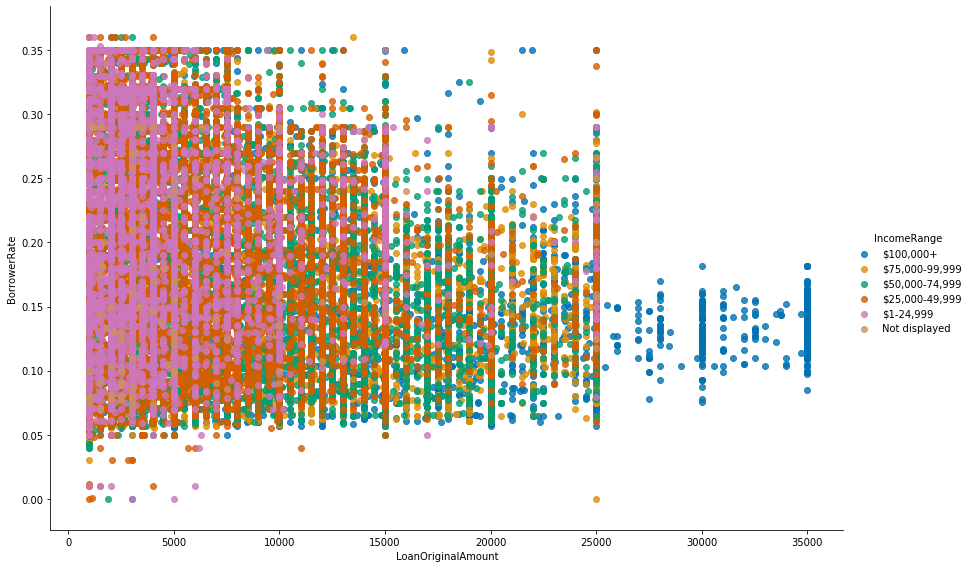

In [58]:
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
g=sns.FacetGrid(data=clean_df,hue="IncomeRange",hue_order=IncomeRange_order,
               size=8, aspect=1.5,palette="colorblind")
g=g.map(sns.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.2,fit_reg=False);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");
plt.show()

We used color to investigate the effect of IncomeRange on the relationship between BorrowerRate and LoanOriginalAmount. It seems by increasing the LoanOriginalAmount, both BorrowerRate and IncomeRange decrease.

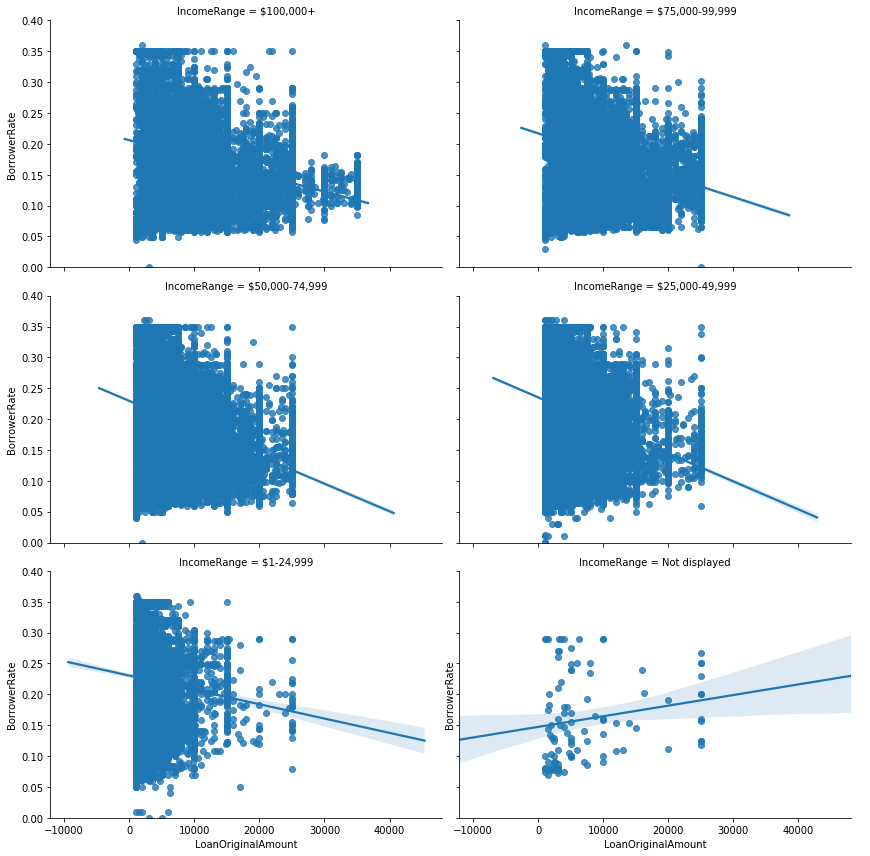

In [59]:
g=sns.FacetGrid(data=clean_df,col="IncomeRange",col_order=IncomeRange_order,
               size=4, aspect=1.5,palette="colorblind",col_wrap=2)
g=g.map(sns.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.2,fit_reg=True);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylim(0,0.40)
plt.ylabel("BorrowerRate");

It could be concluded that, at each particular IncomeRange, by increasing the LoanOriginalAmount, the BorrowerRate decreases.  


Let's take a look at the effect of ProsperScore, the relationship between BorrowerRate and LoanOriginalAmount.It is somehow clumsy to me. Lets see how this graph looks like using a FacetGrid. In each plot, I will show one one ProsperScore.


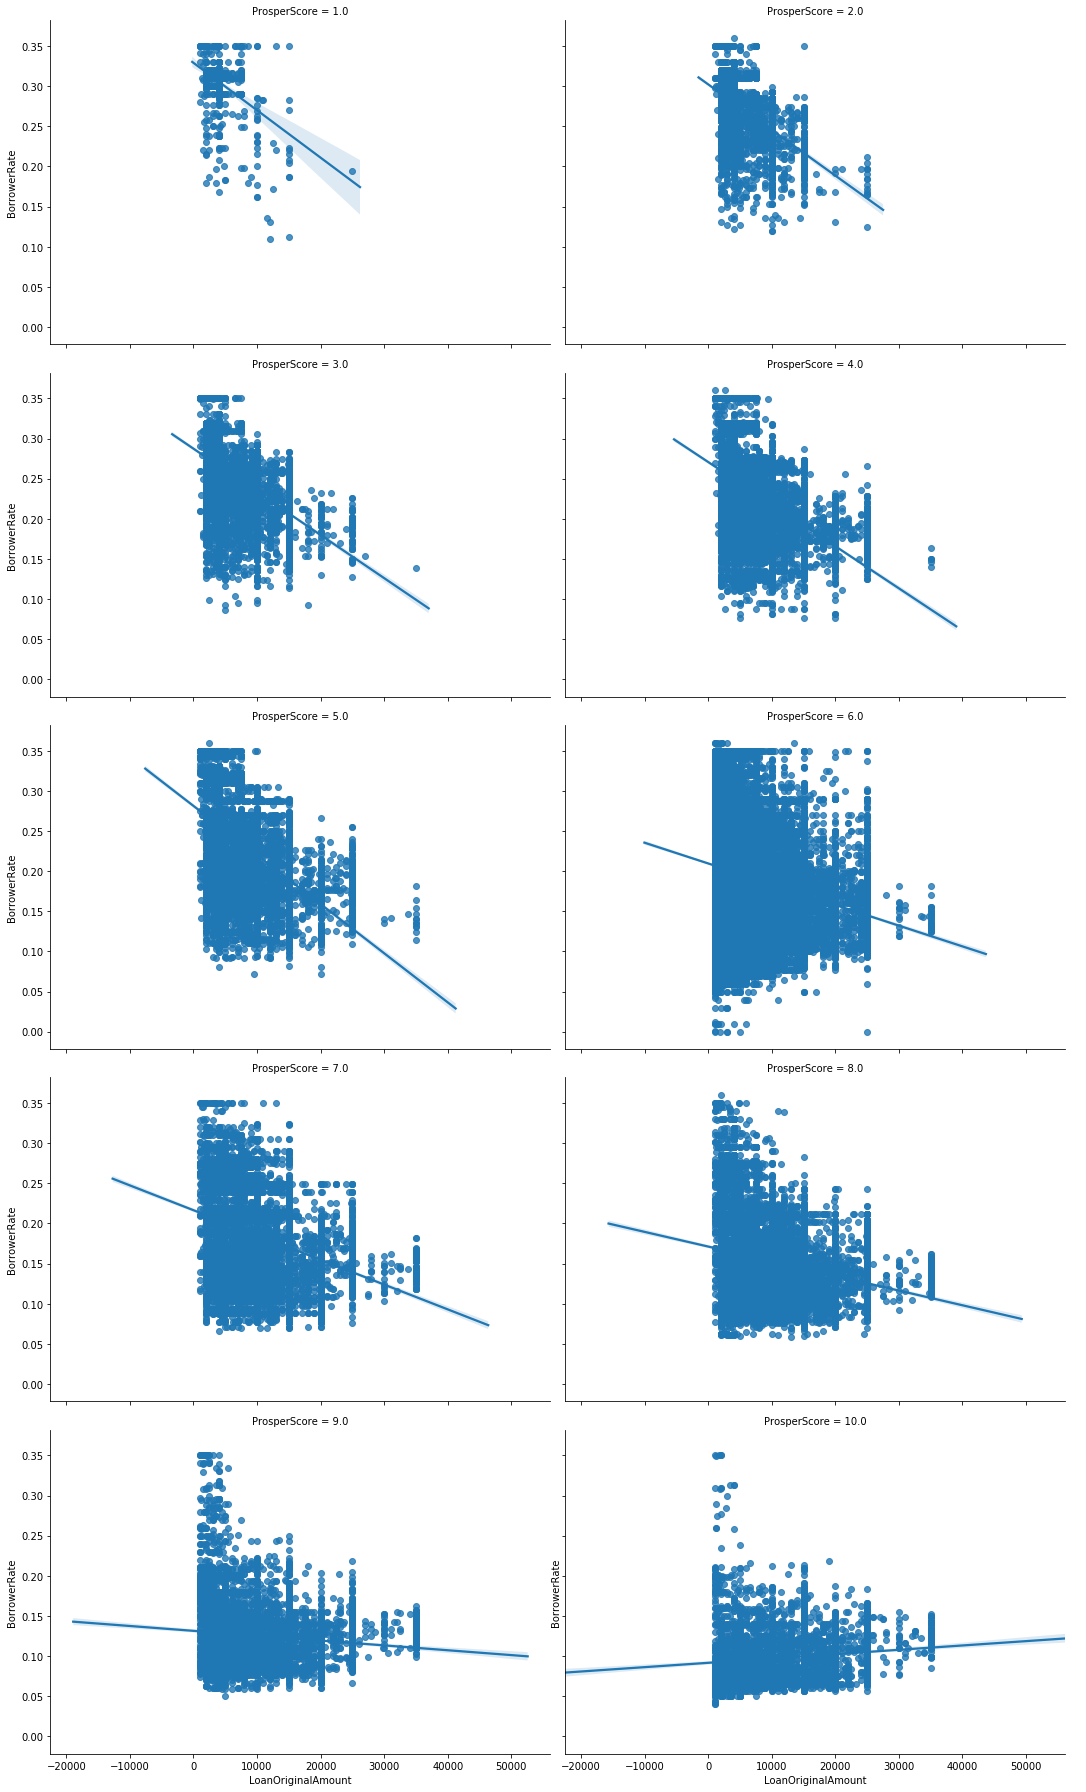

In [60]:
g=sns.FacetGrid(data=clean_df,col="ProsperScore",
               size=5, aspect=1.5,palette="colorblind",col_wrap=2)
g=g.map(sns.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.1,fit_reg=True);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");

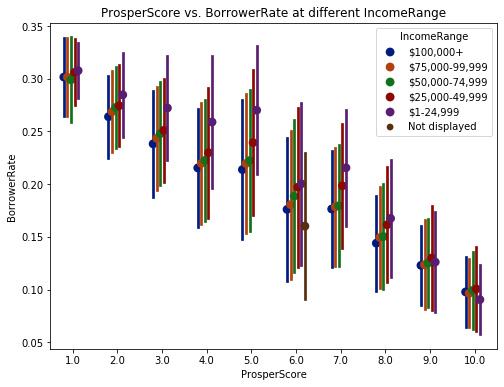

In [72]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = clean_df, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange',
                  hue_order=IncomeRange_order, palette = 'dark', linestyles = '', dodge = 0.4, ci="sd")# 
plt.title('ProsperScore vs. BorrowerRate at different IncomeRange')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>+ At each particular IncomeRange, by increasing the LoanOriginalAmount, the BorrowerRate decreases. Besides, apparently only those who has a IncomeRange above \$100k, are borrowing higher LoanOriginalAmount (\>$25000) and their BorrowerRate is <0.15
>+ Apperntly, people with lower IncomeRange have higher BorrowerRate at each individual ProsperScore
### Were there any interesting or surprising interactions between features?

> In gerenral, at lower ProsperScore (<8), increasing LoanOriginalAmount decreases the BorrowRate. And at higher ProsperScore (>9), the BorrowRate remain s contnstatnt at a low BorrowRate ~0.1

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [62]:
clean_df.to_csv('clean_df.csv',index=False )